## Import Libraries

In [44]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd

import numpy as np
import scipy 
from scipy.linalg import pinv
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import PCA, FastICA, TruncatedSVD
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy import linalg as LA
from sklearn.metrics import mean_squared_error

## Load Datasets

In [2]:
hf_data = pd.read_csv('heart_failure.csv', low_memory=False)
s_data = pd.read_csv('healthcare_stroke.csv', low_memory=False)

In [3]:
# used to determine the likelihood a patient will suffer from heart failure
hf_features = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'RestingECG', 'MaxHR', 'ExerciseAngina']

# used to determine the likelhood a patient will suffer from a stroke
s_features = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']

In [68]:
X_hf = hf_data[hf_features]
Y_hf = hf_data.HeartDisease

# split dataset into training and test set
# 70% training, 30% test
X_hf_train, X_hf_test, Y_hf_train, Y_hf_test = train_test_split(X_hf, Y_hf, test_size=0.3, random_state=1)
%store Y_hf_train
# drop all infinite and nan
X_hf_train = X_hf_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
Y_hf_train = Y_hf_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

# convert strings to numerical labels
num = preprocessing.LabelEncoder()
X_hf_train = X_hf_train.apply(num.fit_transform)
X_hf_test = X_hf_test.apply(num.fit_transform)

Stored 'Y_hf_train' (Series)


In [103]:
X_s = s_data[s_features]
Y_s = s_data.stroke

# split dataset into training and test set
# 70% training, 30% test
X_s_train, X_s_test, Y_s_train, Y_s_test = train_test_split(X_s, Y_s, test_size=0.3, random_state=1)
%store Y_s_train
# drop all infinite and nan
X_s_train = X_s_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
Y_s_train = Y_s_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

# convert strings to numerical labels
X_s_train = X_s_train.apply(num.fit_transform)
X_s_test = X_s_test.apply(num.fit_transform)

Stored 'Y_s_train' (Series)


# PCA

## Heart Failure

Stored 'best_hf_pca' (ndarray)


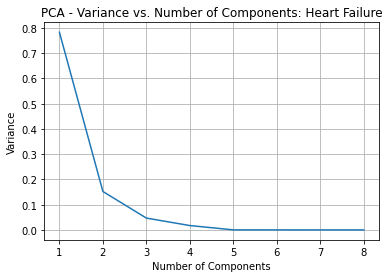

In [69]:
hf_pca = PCA()
hf_pca.fit(X_hf_train)
best_hf_pca = PCA(n_components = 5).fit_transform(X_hf_train)
%store best_hf_pca
plt.figure()
plt.plot(np.arange(1, hf_pca.explained_variance_ratio_.size + 1), hf_pca.explained_variance_ratio_)
plt.xticks(np.arange(1, hf_pca.explained_variance_ratio_.size + 1))
plt.xlabel('Number of Components')
plt.ylabel('Variance')
plt.title('PCA - Variance vs. Number of Components: Heart Failure')
plt.grid()
plt.savefig('pca_analysis_hf.png')
plt.show()

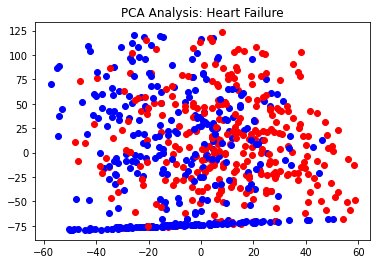

In [70]:
hf_2d = PCA(n_components=2).fit_transform(X_hf_train)

for i in range(len(Y_hf_train)):
    if Y_hf_train[i] == 0:
        plt.scatter(hf_2d[i, 1], hf_2d[i, 0], color = 'r')
    elif Y_hf_train[i] == 1:
        plt.scatter(hf_2d[i, 1], hf_2d[i, 0], color = 'b')
    elif Y_hf_train[i] == 2:
        plt.scatter(hf_2d[i, 1], hf_2d[i, 0], color = 'g')
    elif Y_hf_train[i] == 3:
        plt.scatter(hf_2d[i, 1], hf_2d[i, 0], color = 'k')
    elif Y_hf_train[i] == 4:
        plt.scatter(hf_2d[i, 1], hf_2d[i, 0], color = 'c')
plt.title('PCA Analysis: Heart Failure')
plt.savefig('pca2d_hf.png')
plt.show()

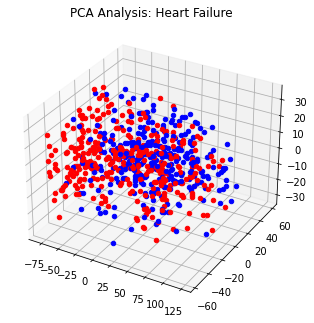

In [71]:
hf_3d = PCA(n_components=3).fit_transform(X_hf_train)

fig = plt.figure()
ax = Axes3D(fig)
for i in range(len(Y_hf_train)):
    if Y_hf_train[i] == 0:
        ax.scatter(hf_3d[i, :][0], hf_3d[i, :][1], hf_3d[i, :][2], c = 'b', marker='o')
    elif Y_hf_train[i] == 1:
        ax.scatter(hf_3d[i, :][0], hf_3d[i, :][1], hf_3d[i, :][2], c = 'r', marker='o')
plt.title('PCA Analysis: Heart Failure')
plt.savefig('pca3d_hf.png')
plt.show()

## Stroke

Stored 'best_s_pca' (ndarray)


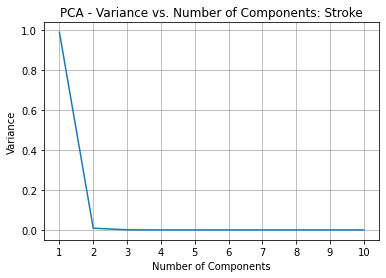

In [102]:
s_pca = PCA()
s_pca.fit(X_s_train)
best_s_pca = PCA(n_components=3).fit_transform(X_s_train)
%store best_s_pca
plt.figure()
plt.plot(np.arange(1, s_pca.explained_variance_ratio_.size + 1), s_pca.explained_variance_ratio_)
plt.xticks(np.arange(1, s_pca.explained_variance_ratio_.size + 1))
plt.xlabel('Number of Components')
plt.ylabel('Variance')
plt.title('PCA - Variance vs. Number of Components: Stroke')
plt.grid()
plt.savefig('pca_analysis_s.png')
plt.show()

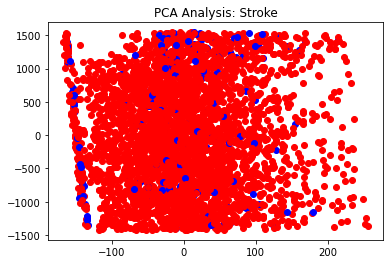

In [74]:
s_2d = PCA(n_components=2).fit_transform(X_s_train)

for i in range(len(Y_s_train)):
    if Y_s_train[i] == 0:
        plt.scatter(s_2d[i, 1], s_2d[i, 0], color = 'r')
    elif Y_s_train[i] == 1:
        plt.scatter(s_2d[i, 1], s_2d[i, 0], color = 'b')
    elif Y_s_train[i] == 2:
        plt.scatter(s_2d[i, 1], s_2d[i, 0], color = 'g')
    elif Y_s_train[i] == 3:
        plt.scatter(s_2d[i, 1], s_2d[i, 0], color = 'k')
    elif Y_s_train[i] == 4:
        plt.scatter(s_2d[i, 1], s_2d[i, 0], color = 'c')
plt.title('PCA Analysis: Stroke')
plt.savefig('pca2d_s.png')
plt.show()

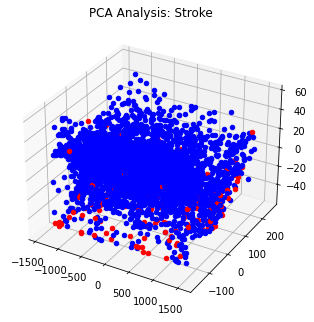

In [75]:
s_3d = PCA(n_components=3).fit_transform(X_s_train)
fig = plt.figure()
ax = Axes3D(fig)
for i in range(len(Y_s_train)):
    if Y_s_train[i] == 0:
        ax.scatter(s_3d[i, :][0], s_3d[i, :][1], s_3d[i, :][2], c = 'b', marker='o')
    elif Y_s_train[i] == 1:
        ax.scatter(s_3d[i, :][0], s_3d[i, :][1], s_3d[i, :][2], c = 'r', marker='o')
plt.title('PCA Analysis: Stroke')
plt.savefig('pca3d_s.png')
plt.show()

# ICA

## Heart Failure

In [76]:
best_hf_ica = FastICA(n_components=5).fit_transform(X_hf_train)
%store best_hf_ica

Stored 'best_hf_ica' (ndarray)


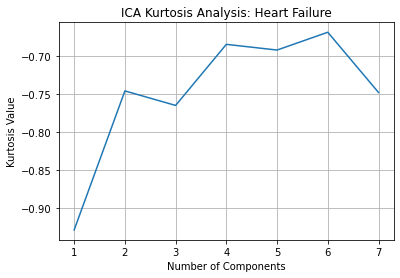

In [77]:
arr = []
for i in range(1,8):
    dim_red = FastICA(n_components = i).fit_transform(X_hf_train)
    kurt = scipy.stats.kurtosis(dim_red)
    arr.append(np.mean(kurt))
arr = np.array(arr)
plt.plot(np.arange(1,8),arr)
plt.title('ICA Kurtosis Analysis: Heart Failure')
plt.xlabel('Number of Components')
plt.ylabel('Kurtosis Value')
plt.grid()
plt.savefig('ica_k_hf.png')
plt.show()

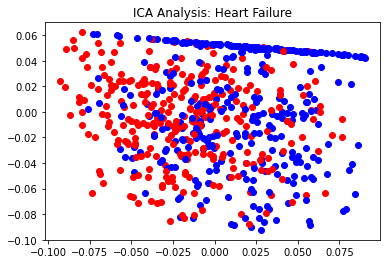

In [78]:
hf_2d_ica = FastICA(n_components=2).fit_transform(X_hf_train)

for i in range(len(Y_hf_train)):
    if Y_hf_train[i] == 0:
        plt.scatter(hf_2d_ica[i, 1], hf_2d_ica[i, 0], color = 'r')
    elif Y_hf_train[i] == 1:
        plt.scatter(hf_2d_ica[i, 1], hf_2d_ica[i, 0], color = 'b')
    elif Y_hf_train[i] == 2:
        plt.scatter(hf_2d_ica[i, 1], hf_2d_ica[i, 0], color = 'g')
    elif Y_hf_train[i] == 3:
        plt.scatter(hf_2d_ica[i, 1], hf_2d_ica[i, 0], color = 'k')
    elif Y_hf_train[i] == 4:
        plt.scatter(hf_2d_ica[i, 1], hf_2d_ica[i, 0], color = 'c')
plt.title('ICA Analysis: Heart Failure')
plt.savefig('ica2d_hf.png')
plt.show()

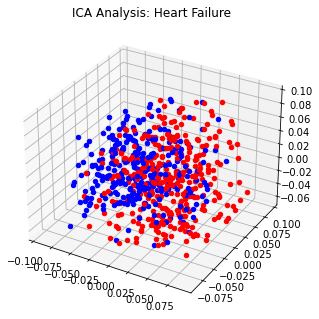

In [80]:
hf_3d_ica = FastICA(n_components=3).fit_transform(X_hf_train)

fig = plt.figure()
ax = Axes3D(fig)
for i in range(len(Y_hf_train)):
    if Y_hf_train[i] == 0:
        ax.scatter(hf_3d_ica[i, :][0], hf_3d_ica[i, :][1], hf_3d_ica[i, :][2], c = 'b', marker='o')
    elif Y_hf_train[i] == 1:
        ax.scatter(hf_3d_ica[i, :][0], hf_3d_ica[i, :][1], hf_3d_ica[i, :][2], c = 'r', marker='o')
plt.title('ICA Analysis: Heart Failure')
plt.savefig('ica3d_hf.png')
plt.show()

## Stroke

In [81]:
best_s_ica = FastICA(n_components=3).fit_transform(X_s_train)
%store best_s_ica

Stored 'best_s_ica' (ndarray)


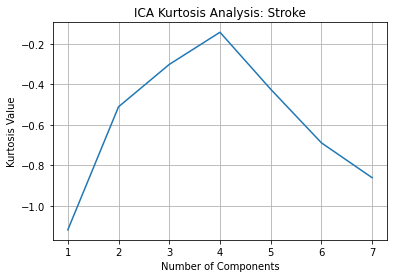

In [82]:
arr = []
for i in range(1,8):
    dim_red = FastICA(n_components = i).fit_transform(X_s_train)
    kurt = scipy.stats.kurtosis(dim_red)
    arr.append(np.mean(kurt))
arr = np.array(arr)
plt.plot(np.arange(1,8),arr)
plt.title('ICA Kurtosis Analysis: Stroke')
plt.xlabel('Number of Components')
plt.ylabel('Kurtosis Value')
plt.grid()
plt.savefig('ica_k_s.png')
plt.show()

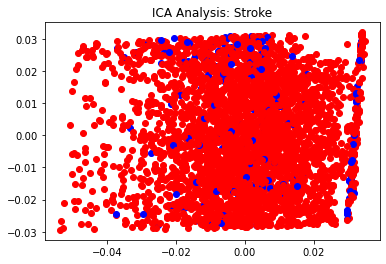

In [83]:
s_2d_ica = FastICA(n_components=2).fit_transform(X_s_train)

for i in range(len(Y_s_train)):
    if Y_s_train[i] == 0:
        plt.scatter(s_2d_ica[i, 1], s_2d_ica[i, 0], color = 'r')
    elif Y_s_train[i] == 1:
        plt.scatter(s_2d_ica[i, 1], s_2d_ica[i, 0], color = 'b')
    elif Y_s_train[i] == 2:
        plt.scatter(s_2d_ica[i, 1], s_2d_ica[i, 0], color = 'g')
    elif Y_s_train[i] == 3:
        plt.scatter(s_2d_ica[i, 1], s_2d_ica[i, 0], color = 'k')
    elif Y_s_train[i] == 4:
        plt.scatter(s_2d_ica[i, 1], s_2d_ica[i, 0], color = 'c')
plt.title('ICA Analysis: Stroke')
plt.savefig('ica2d_s.png')
plt.show()

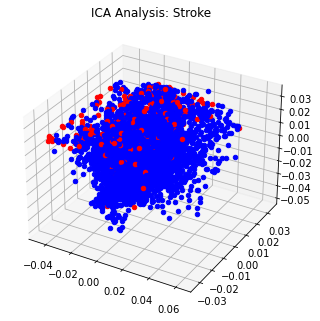

In [84]:
s_3d_ica = FastICA(n_components=3).fit_transform(X_s_train)
fig = plt.figure()
ax = Axes3D(fig)
for i in range(len(Y_s_train)):
    if Y_s_train[i] == 0:
        ax.scatter(s_3d_ica[i, :][0], s_3d_ica[i, :][1], s_3d_ica[i, :][2], c = 'b', marker='o')
    elif Y_s_train[i] == 1:
        ax.scatter(s_3d_ica[i, :][0], s_3d_ica[i, :][1], s_3d_ica[i, :][2], c = 'r', marker='o')
plt.title('ICA Analysis: Stroke')
plt.savefig('ica3d_s.png')
plt.show()

# Random Projection

## Heart Failure

### Gaussian Random Projection Analysis

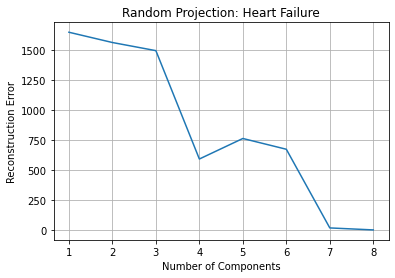

In [85]:
arr = []
for i in range(1,9):
    rp = GaussianRandomProjection(n_components=i)
    X_rp = rp.fit(X_hf_train)
    p = pinv(X_rp.components_)
    w = X_rp.components_
    reconstructed = ((p@w)@(X_hf_train.T)).T 
    arr.append(mean_squared_error(X_hf_train,reconstructed))

arr = np.array(arr)
plt.plot(np.arange(1,9),arr)
plt.title('Random Projection: Heart Failure')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error')
plt.grid()
plt.savefig('RP_hf.png')
plt.show()

In [86]:
best_hf_rp = GaussianRandomProjection(n_components=5).fit_transform(X_hf_train)
%store best_hf_rp

Stored 'best_hf_rp' (ndarray)


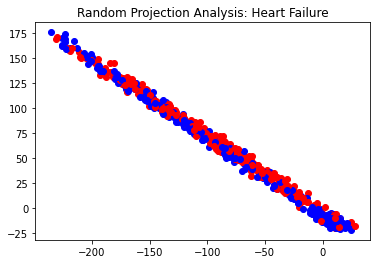

In [87]:
hf_2d_rp = GaussianRandomProjection(n_components=2).fit_transform(X_hf_train)

for i in range(len(Y_hf_train)):
    if Y_hf_train[i] == 0:
        plt.scatter(hf_2d_rp[i, 1], hf_2d_rp[i, 0], color = 'r')
    elif Y_hf_train[i] == 1:
        plt.scatter(hf_2d_rp[i, 1], hf_2d_rp[i, 0], color = 'b')
    elif Y_hf_train[i] == 2:
        plt.scatter(hf_2d_rp[i, 1], hf_2d_rp[i, 0], color = 'g')
    elif Y_hf_train[i] == 3:
        plt.scatter(hf_2d_rp[i, 1], hf_2d_rp[i, 0], color = 'k')
    elif Y_hf_train[i] == 4:
        plt.scatter(hf_2d_rp[i, 1], hf_2d_rp[i, 0], color = 'c')
plt.title('Random Projection Analysis: Heart Failure')
plt.savefig('rp2d_hf.png')
plt.show()

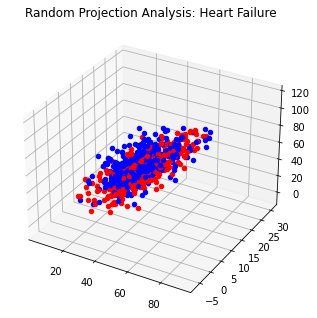

In [88]:
hf_3d_rp = GaussianRandomProjection(n_components=3).fit_transform(X_hf_train)

fig = plt.figure()
ax = Axes3D(fig)
for i in range(len(Y_hf_train)):
    if Y_hf_train[i] == 0:
        ax.scatter(hf_3d_rp[i, :][0], hf_3d_rp[i, :][1], hf_3d_rp[i, :][2], c = 'b', marker='o')
    elif Y_hf_train[i] == 1:
        ax.scatter(hf_3d_rp[i, :][0], hf_3d_rp[i, :][1], hf_3d_rp[i, :][2], c = 'r', marker='o')
plt.title('Random Projection Analysis: Heart Failure')
plt.savefig('rp3d_hf.png')
plt.show()

## Stroke

### Gaussian Random Projection Analysis

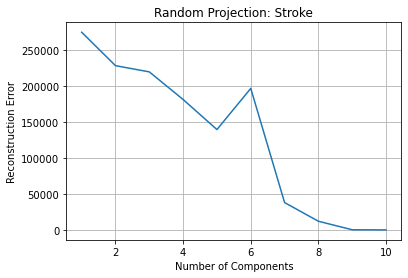

In [89]:
arr = []
for i in range(1,11):
    rp = GaussianRandomProjection(n_components=i)
    X_rp = rp.fit(X_s_train)
    p = pinv(X_rp.components_)
    w = X_rp.components_
    reconstructed = ((p@w)@(X_s_train.T)).T 
    arr.append(mean_squared_error(X_s_train,reconstructed))

arr = np.array(arr)
plt.plot(np.arange(1,11),arr)
plt.title('Random Projection: Stroke')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error')
plt.grid()
plt.savefig('RP_s.png')
plt.show()

In [90]:
best_s_rp = GaussianRandomProjection(n_components=3).fit_transform(X_s_train)
%store best_s_rp

Stored 'best_s_rp' (ndarray)


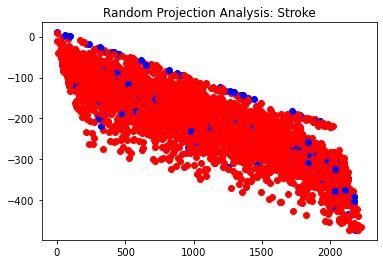

In [91]:
s_2d_rp = GaussianRandomProjection(n_components=2).fit_transform(X_s_train)

for i in range(len(Y_s_train)):
    if Y_s_train[i] == 0:
        plt.scatter(s_2d_rp[i, 1], s_2d_rp[i, 0], color = 'r')
    elif Y_s_train[i] == 1:
        plt.scatter(s_2d_rp[i, 1], s_2d_rp[i, 0], color = 'b')
    elif Y_s_train[i] == 2:
        plt.scatter(s_2d_rp[i, 1], s_2d_rp[i, 0], color = 'g')
    elif Y_s_train[i] == 3:
        plt.scatter(s_2d_rp[i, 1], s_2d_rp[i, 0], color = 'k')
    elif Y_s_train[i] == 4:
        plt.scatter(s_2d_rp[i, 1], s_2d_rp[i, 0], color = 'c')
plt.title('Random Projection Analysis: Stroke')
plt.savefig('rp2d_s.png')
plt.show()

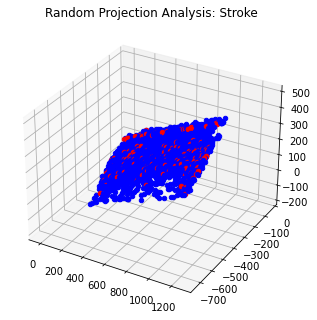

In [92]:
s_3d_rp = GaussianRandomProjection(n_components=3).fit_transform(X_s_train)
fig = plt.figure()
ax = Axes3D(fig)
for i in range(len(Y_s_train)):
    if Y_s_train[i] == 0:
        ax.scatter(s_3d_rp[i, :][0], s_3d_rp[i, :][1], s_3d_rp[i, :][2], c = 'b', marker='o')
    elif Y_s_train[i] == 1:
        ax.scatter(s_3d_rp[i, :][0], s_3d_rp[i, :][1], s_3d_rp[i, :][2], c = 'r', marker='o')
plt.title('Random Projection Analysis: Stroke')
plt.savefig('rp3d_s.png')
plt.show()

# Truncated SVD

## Heart Failure

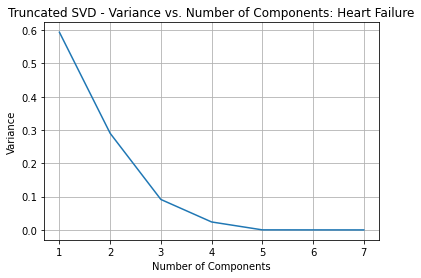

In [93]:
hf_tsvd = TruncatedSVD(n_components=7)
hf_tsvd.fit(X_hf_train)

plt.figure()
plt.plot(np.arange(1, hf_tsvd.explained_variance_ratio_.size + 1), hf_tsvd.explained_variance_ratio_)
plt.xticks(np.arange(1, hf_tsvd.explained_variance_ratio_.size + 1))
plt.xlabel('Number of Components')
plt.ylabel('Variance')
plt.title('Truncated SVD - Variance vs. Number of Components: Heart Failure')
plt.grid()
plt.savefig('tsvd_hf.png')
plt.show()

In [94]:
best_hf_tsvd = TruncatedSVD(n_components=5).fit_transform(X_hf_train)
%store best_hf_tsvd

Stored 'best_hf_tsvd' (ndarray)


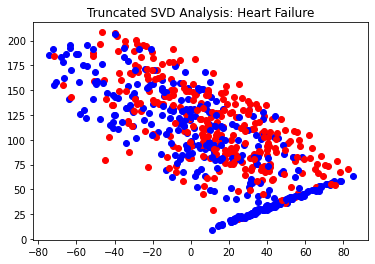

In [95]:
hf_2d_tsvd = TruncatedSVD(n_components=2).fit_transform(X_hf_train)

for i in range(len(Y_hf_train)):
    if Y_hf_train[i] == 0:
        plt.scatter(hf_2d_tsvd[i, 1], hf_2d_tsvd[i, 0], color = 'r')
    elif Y_hf_train[i] == 1:
        plt.scatter(hf_2d_tsvd[i, 1], hf_2d_tsvd[i, 0], color = 'b')
    elif Y_hf_train[i] == 2:
        plt.scatter(hf_2d_tsvd[i, 1], hf_2d_tsvd[i, 0], color = 'g')
    elif Y_hf_train[i] == 3:
        plt.scatter(hf_2d_tsvd[i, 1], hf_2d_tsvd[i, 0], color = 'k')
    elif Y_hf_train[i] == 4:
        plt.scatter(hf_2d_tsvd[i, 1], hf_2d_tsvd[i, 0], color = 'c')
plt.title('Truncated SVD Analysis: Heart Failure')
plt.savefig('tsvd2d_hf.png')
plt.show()

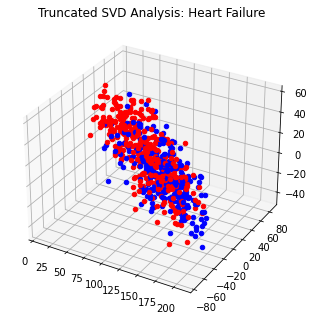

In [96]:
hf_3d_tsvd = TruncatedSVD(n_components=3).fit_transform(X_hf_train)

fig = plt.figure()
ax = Axes3D(fig)
for i in range(len(Y_hf_train)):
    if Y_hf_train[i] == 0:
        ax.scatter(hf_3d_tsvd[i, :][0], hf_3d_tsvd[i, :][1], hf_3d_tsvd[i, :][2], c = 'b', marker='o')
    elif Y_hf_train[i] == 1:
        ax.scatter(hf_3d_tsvd[i, :][0], hf_3d_tsvd[i, :][1], hf_3d_tsvd[i, :][2], c = 'r', marker='o')
plt.title('Truncated SVD Analysis: Heart Failure')
plt.savefig('tsvd3d_hf.png')
plt.show()

## Stroke

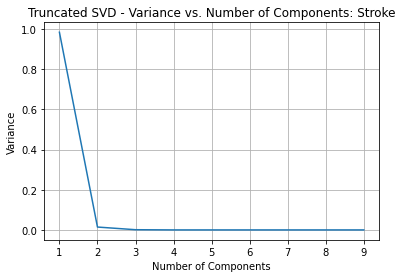

In [97]:
s_tsvd = TruncatedSVD(n_components=9)
s_tsvd.fit(X_s_train)

plt.figure()
plt.plot(np.arange(1, s_tsvd.explained_variance_ratio_.size + 1), s_tsvd.explained_variance_ratio_)
plt.xticks(np.arange(1, s_tsvd.explained_variance_ratio_.size + 1))
plt.xlabel('Number of Components')
plt.ylabel('Variance')
plt.title('Truncated SVD - Variance vs. Number of Components: Stroke')
plt.grid()
plt.savefig('tsvd_s.png')
plt.show()

In [98]:
best_s_tsvd = TruncatedSVD(n_components=3).fit_transform(X_s_train)
%store best_s_tsvd

Stored 'best_s_tsvd' (ndarray)


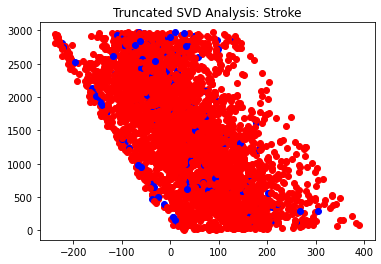

In [99]:
s_2d_tsvd = TruncatedSVD(n_components=2).fit_transform(X_s_train)

for i in range(len(Y_s_train)):
    if Y_s_train[i] == 0:
        plt.scatter(s_2d_tsvd[i, 1], s_2d_tsvd[i, 0], color = 'r')
    elif Y_s_train[i] == 1:
        plt.scatter(s_2d_tsvd[i, 1], s_2d_tsvd[i, 0], color = 'b')
    elif Y_s_train[i] == 2:
        plt.scatter(s_2d_tsvd[i, 1], s_2d_tsvd[i, 0], color = 'g')
    elif Y_s_train[i] == 3:
        plt.scatter(s_2d_tsvd[i, 1], s_2d_tsvd[i, 0], color = 'k')
    elif Y_s_train[i] == 4:
        plt.scatter(s_2d_tsvd[i, 1], s_2d_tsvd[i, 0], color = 'c')
plt.title('Truncated SVD Analysis: Stroke')
plt.savefig('tsvd2d_s.png')
plt.show()

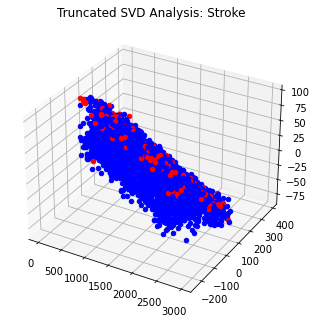

In [100]:
s_3d_tsvd = TruncatedSVD(n_components=3).fit_transform(X_s_train)
fig = plt.figure()
ax = Axes3D(fig)
for i in range(len(Y_s_train)):
    if Y_s_train[i] == 0:
        ax.scatter(s_3d_tsvd[i, :][0], s_3d_tsvd[i, :][1], s_3d_tsvd[i, :][2], c = 'b', marker='o')
    elif Y_s_train[i] == 1:
        ax.scatter(s_3d_tsvd[i, :][0], s_3d_tsvd[i, :][1], s_3d_tsvd[i, :][2], c = 'r', marker='o')
plt.title('Truncated SVD Analysis: Stroke')
plt.savefig('tsvd3d_s.png')
plt.show()